<div align='center'>
    <a href="https://ibb.co/3CT7Q9g"><img src="https://i.ibb.co/YLN3wFH/imgtaxi.webp" alt="imgtaxi" border="0"></a>
</div>

# Table Of Contents: <a id=0></a>
* 1. [Introduction](#1)
        * 1.1 [About Seaborn Datasets](#1.1)
        * 1.2 [About Taxi's Dataset From Seaborn Library](#1.2)
* 2. [First Organization](#2)
        * 2.1 [Loading Libraries](#2.1)
        * 2.2 [Loading Dataset](#2.1)
        * 2.3 [Getting To Know The Variables](#2.3)
        * 2.4 [Exploring The Dataset](#2.4)
        * 2.5 [Missing Values](#2.5)
        * 2.6 [Statistical Summary](#2.6)
            *  2.6.1 [Analysis Output](#2.6.1)
        *  2.7 [Unique Values](#2.7)
* 3. [Data Engineering](#3)
        * 3.1 [Extract "Day", "Month" and "Year" From Pickup Variable](#3.1)
        * 3.2 [Add Trip Duration Variable To Dataframe](#3.2)
        * 3.3 [Tip To Fare Ratio](#3.3)
* 4. [Exploratory Data Analysis](#4)
        * 4.1 [Taxi's Color](#4.1)
        * 4.2 [Paynment Methods](#4.2)
        * 4.3 [Pick Zone](#4.3)
        * 4.4 [Dropoff Zone](#4.4)
        * 4.5 [Dropoff Borough](#4.5)
        * 4.6 [Pickup Borough](#4.6)
        * 4.7 [Hourly Demands](#4.7)
        * 4.8 [Daily Demands](#4.8)
        * 4.9 [Most Visit Pickup/Dropoff Zones](#4.9)
        * 4.10 [Longest Trips](#4.10)
        * 4.11 [Numeric Variables Distribution](#4.11)
        * 4.12 [Boxplot: Checking Outliers for Numeric Variables](#4.12)
        * 4.13 [Trip Durations Between Weekdays and Weekends](#4.13)
        * 4.14 [Longest and Shortest Trips Based on Duration](#4.14)
            * 4.14.1 [Relationship Between Distance, Duration and Total Amount](#4.14.1)
        * 4.15 [Regression Plot: Relationship Between Target (total) And Numeric Variables](#4.15)
        * 4.16 [Correlation Heatmap](#4.16)
* 5. [Modelling (Target: total)](#5)
        * 5.1 [Preparing For Modelling](#5.1)
            * 5.1.1 [Remove Outlier](#5.1.1)
            * 5.1.2 [Feature Selection](#5.1.2)
            * 5.1.3 [Feature Scaling](#5.1.3)
        * 5.2 [Linear Regression Modelling ](#5.2)
        * 5.3 [Learning Curve](#5.3)

# 1. Introduction <a id=1></a> 

## 1.1 About Seaborn Datasets <a id=1.1></a>

Seaborn is a powerful Python visualization library built on top of matplotlib. One of its convenient features is the availability of built-in datasets that can be used for practicing data visualization techniques and testing statistical models. These datasets are included in the Seaborn library and can be loaded directly into your Python environment.

Seaborn provides several datasets for different types of analysis, ranging from simple to complex. Some of the commonly used datasets include:

1. **iris**: This dataset contains measurements of sepal length, sepal width, petal length, and petal width for three species of iris flowers. It is often used for demonstrating classification and clustering algorithms.

2. **tips**: This dataset contains information about tips given to restaurant servers, including total bill, tip amount, gender of the payer, day of the week, time of day, size of the party, and whether the party was a smoker or non-smoker. It is commonly used for exploring relationships between variables and making predictions about tip amounts.

3. **titanic**: This dataset contains information about passengers aboard the Titanic, including their survival status, class, sex, age, number of siblings/spouses aboard, number of parents/children aboard, fare, and port of embarkation. It is often used for survival analysis and predictive modeling.

4. **fmri**: This dataset contains functional magnetic resonance imaging (fMRI) data from an experiment measuring brain activity in response to different stimuli. It includes data on the signal intensity over time for multiple regions of interest in the brain. It is commonly used for analyzing brain activity patterns and conducting statistical tests.

5. **planets**: This dataset contains information about exoplanets discovered by astronomers, including the method of discovery, the year of discovery, the mass of the planet, the orbital period, and the distance from the parent star. It is often used for studying trends in exoplanet discovery and exploring relationships between planetary properties.

These datasets are readily available within Seaborn and can be loaded using the `load_dataset()` function. They provide a convenient way to experiment with data visualization techniques and machine learning algorithms without the need to download or import external datasets. Additionally, they come with built-in documentation and examples, making them ideal for learning and practicing data analysis skills.

## 1.1 About Taxi's Dataset From Seaborn Library <a id=1.1></a>

The NYC Taxi Trip Duration dataset is a popular dataset used for exploratory data analysis and model building. It contains data regarding several taxi trips and their durations in New York City. The dataset includes information such as pickup and dropoff coordinates, passengers, distance, fare, tip, tolls, total amount, color, payment method, pickup and dropoff zones, and the respective boroughs. The dataset is often used for various data analysis and visualization techniques to gain insights and understand the relationships between different variables and the target variable, trip duration.

# 2. First Organization <a id=2></a>

## 2.1 Loading Libraries <a id=2.1></a>

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

## 2.2 Loading Dataset <a id=2.2></a>

In [223]:
df = sns.load_dataset('taxis')

## 2.3 Getting To Know The Variables <a id=2.3></a>

In [224]:
# Overall view of datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

1. **pickup**: This variable contains datetime values representing the pickup times of the taxi trips.

2. **dropoff**: Similar to the pickup variable, this contains datetime values representing the dropoff times of the taxi trips.

3. **passengers**: This variable provides the number of passengers in each taxi trip.

4. **distance**: The distance variable indicates the distance covered during each taxi trip, typically in miles or kilometers.

5. **fare**: This variable represents the fare amount for each taxi trip.

6. **tip**: The tip variable contains the amount of tip given for each taxi trip.

7. **tolls**: This variable provides information about any tolls paid during the taxi trips.

8. **total**: The total variable represents the total amount paid for each taxi trip, including fare, tip, and any additional charges.

9. **color**: This categorical variable likely represents the color or type of the taxi.

10. **payment**: This variable indicates the payment method used for each taxi trip.

11. **pickup_zone**: It provides information about the pickup zone or area for each taxi trip.

12. **dropoff_zone**: Similar to pickup_zone, this variable indicates the dropoff zone or area for each taxi trip.

13. **pickup_borough**: This variable specifies the borough or area where the pickup occurred.

14. **dropoff_borough**: Similar to pickup_borough, this variable specifies the borough or area where the dropoff occurred.

## 2.4 Exploring The Dataset <a id=2.4></a>

In [225]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [226]:
df.shape

(6433, 14)

In [227]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [229]:
# check data types
df.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

## 2.5 Missing Values <a id=2.5></a>

In [230]:
# Missing Values
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

**In this dataset are few missing values , for first steps we can drop and remove these missing values from dataset**

In [231]:
df.dropna(inplace=True)

## 2.6 Statistical Summary <a id=2.6></a>

In [232]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
pickup,6341,2019-03-16 08:30:26.574830080,2019-02-28 23:29:03,2019-03-08 15:28:20,2019-03-15 21:57:47,2019-03-23 17:45:29,2019-03-31 23:43:45,NaN
dropoff,6341,2019-03-16 08:44:47.525784832,2019-02-28 23:32:35,2019-03-08 15:54:00,2019-03-15 22:07:48,2019-03-23 17:57:56,2019-04-01 00:13:58,NaN
passengers,6341.0,1.544078,0.0,1.0,1.0,2.0,6.0,1.207948
distance,6341.0,2.997707,0.0,0.99,1.65,3.2,36.7,3.719775
fare,6341.0,12.887931,1.0,6.5,9.5,15.0,150.0,10.722249
tip,6341.0,1.972703,0.0,0.0,1.75,2.82,23.19,2.361897
tolls,6341.0,0.314793,0.0,0.0,0.0,0.0,24.02,1.369174
total,6341.0,18.310263,1.3,10.8,14.16,20.3,174.82,12.950365


### 2.6.1 Analysis Output <a id=2.6.1></a>


- **Passengers**: The average number of passengers per trip is approximately 1.54, with a standard deviation of 1.20. The data shows that most trips have 1 or 2 passengers, with a maximum of 6 passengers.

- **Distance**: The average distance covered during the taxi trips is around 3.02 miles, with a standard deviation of 3.83. The data indicates a wide range of distances, from a minimum of 0 miles to a maximum of 36.70 miles.

- **Fare**: The average fare for the taxi trips is approximately $13.09, with a standard deviation of $11.55. The fares range from a minimum of $1.00 to a maximum of $150.00, with most fares falling between $6.50 and $15.00.

- **Tip**: On average, the tips given for the taxi trips amount to around $1.98, with a standard deviation of $2.45. The data shows a wide range of tip amounts, from a minimum of $0.00 to a maximum of $33.20.

- **Tolls**: The average tolls paid during the taxi trips amount to approximately $0.33, with a standard deviation of $1.42. Most trips did not incur toll charges, although the maximum toll paid was $24.02.

- **Total**: The average total amount paid for the taxi trips is approximately $18.52, with a standard deviation of $13.82. The total amounts range from a minimum of $1.30 to a maximum of $174.82, with the majority falling between $10.80 and $20.30.


## 2.7 Unique Values <a id=2.7></a>

In [233]:
pd.DataFrame(df.nunique(), columns=['Unique Values Count'])

,Unique Values Count
pickup,6322
dropoff,6333
passengers,7
distance,1064
fare,206
tip,481
tolls,14
total,877
color,2
payment,2


In [234]:
pd.DataFrame(df['color'].value_counts())

,count
color,
yellow,5373
green,968


In [235]:
pd.DataFrame(df['payment'].value_counts())

,count
payment,
credit card,4546
cash,1795


In [236]:
pd.DataFrame(df['pickup_zone'].value_counts())

,count
pickup_zone,
Midtown Center,227
Penn Station/Madison Sq West,209
Upper East Side South,208
Clinton East,208
Midtown East,196
...,...
Highbridge Park,1
Brighton Beach,1
Bronx Park,1


In [237]:
pd.DataFrame(df['dropoff_zone'].value_counts())

,count
dropoff_zone,
Upper East Side North,244
Murray Hill,217
Midtown Center,215
Midtown East,175
Upper East Side South,173
...,...
Douglaston,1
Stapleton,1
Brighton Beach,1


In [238]:
pd.DataFrame(df['pickup_borough'].value_counts())

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


In [239]:
pd.DataFrame(df['dropoff_borough'].value_counts())

,count
dropoff_borough,
Manhattan,5172
Queens,534
Brooklyn,497
Bronx,136
Staten Island,2


# 3. Data Engineering <a id=3></a>

## 3.1 Extract "Day", "Month" and "Year" From Pickup Variable <a id=3.1></a>

In [240]:
# Extract day, month and year from pickup feature
df['trip_day'] = df['pickup'].dt.day
df['trip_month'] = df['pickup'].dt.month
df['trip_year'] = df['pickup'].dt.year

In [241]:
# Check Dataframe for new features 
df.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_day,trip_month,trip_year
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,3,2019


## 3.2 Add Trip Duration Variable To Dataframe <a id=3.2></a>

In [242]:
# Calculate time difference between pickup and dropoff to get trip duration
df['trip_duration'] = (df['dropoff'] - df['pickup'])
# Convert trip duration to minutes
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60
# Drop the intermediate 'trip_duration' column if needed
df.drop(columns=['trip_duration'], inplace=True)

In [243]:
df.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_day,trip_month,trip_year,trip_duration_minutes
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,3,2019,6.25


## 3.3 Tip To Fare Ratio <a id=3.3></a>

In [244]:
df['tip_fare_ratio'] = (df['tip'] / df['fare']) * 100

In [245]:
df.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,trip_day,trip_month,trip_year,trip_duration_minutes,tip_fare_ratio
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,23,3,2019,6.25,30.714286


# 4. Exploratory Data Analysis <a id=4></a>
[Go To Project Content](#0)


In [246]:
def frequency_table(col, sort=False, n=10):
    """
    Generate a frequency table for a categorical column in a DataFrame.

    Parameters:
    - col (str): Name of the column for which the frequency table is generated.
    - sort (bool, optional): Whether to sort the frequency table by counts. Default is False.
    - n (int, optional): Number of top categories to display in the frequency table. Default is 10.

    Returns:
    - DataFrame: Frequency table showing counts of unique categories in the specified column,
                 sorted in descending order if sort is True, and limited to top n categories.
    """
    return df.groupby(col)[col].count().sort_values(ascending=sort).to_frame().head(n)


## 4.1 Taxi's Color <a id=4.1></a>

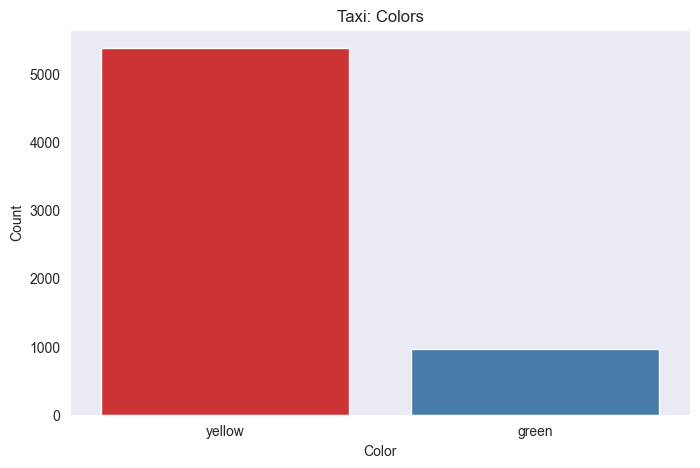

In [247]:
plt.figure(figsize=(8, 5))
sns.set_style('dark')
sns.countplot(data=df, x='color', palette='Set1')
plt.title("Taxi: Colors")
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

In [248]:
frequency_table('color')

,color
color,
yellow,5373
green,968


## 4.2 Payment Methods <a id=4.2></a>

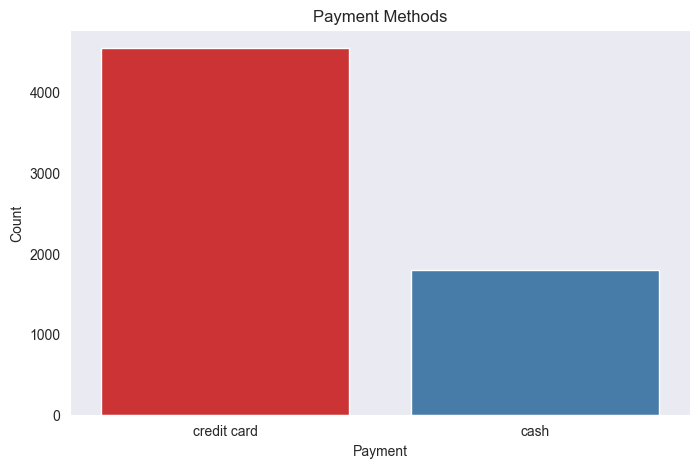

In [249]:
plt.figure(figsize=(8, 5))
sns.set_style('dark')
sns.countplot(data=df, x='payment', palette='Set1')
plt.title("Payment Methods")
plt.xlabel("Payment")
plt.ylabel("Count")
plt.show()

In [250]:
frequency_table('payment')

,payment
payment,
credit card,4546
cash,1795


## 4.3 Pick Zone <a id=4.3></a>

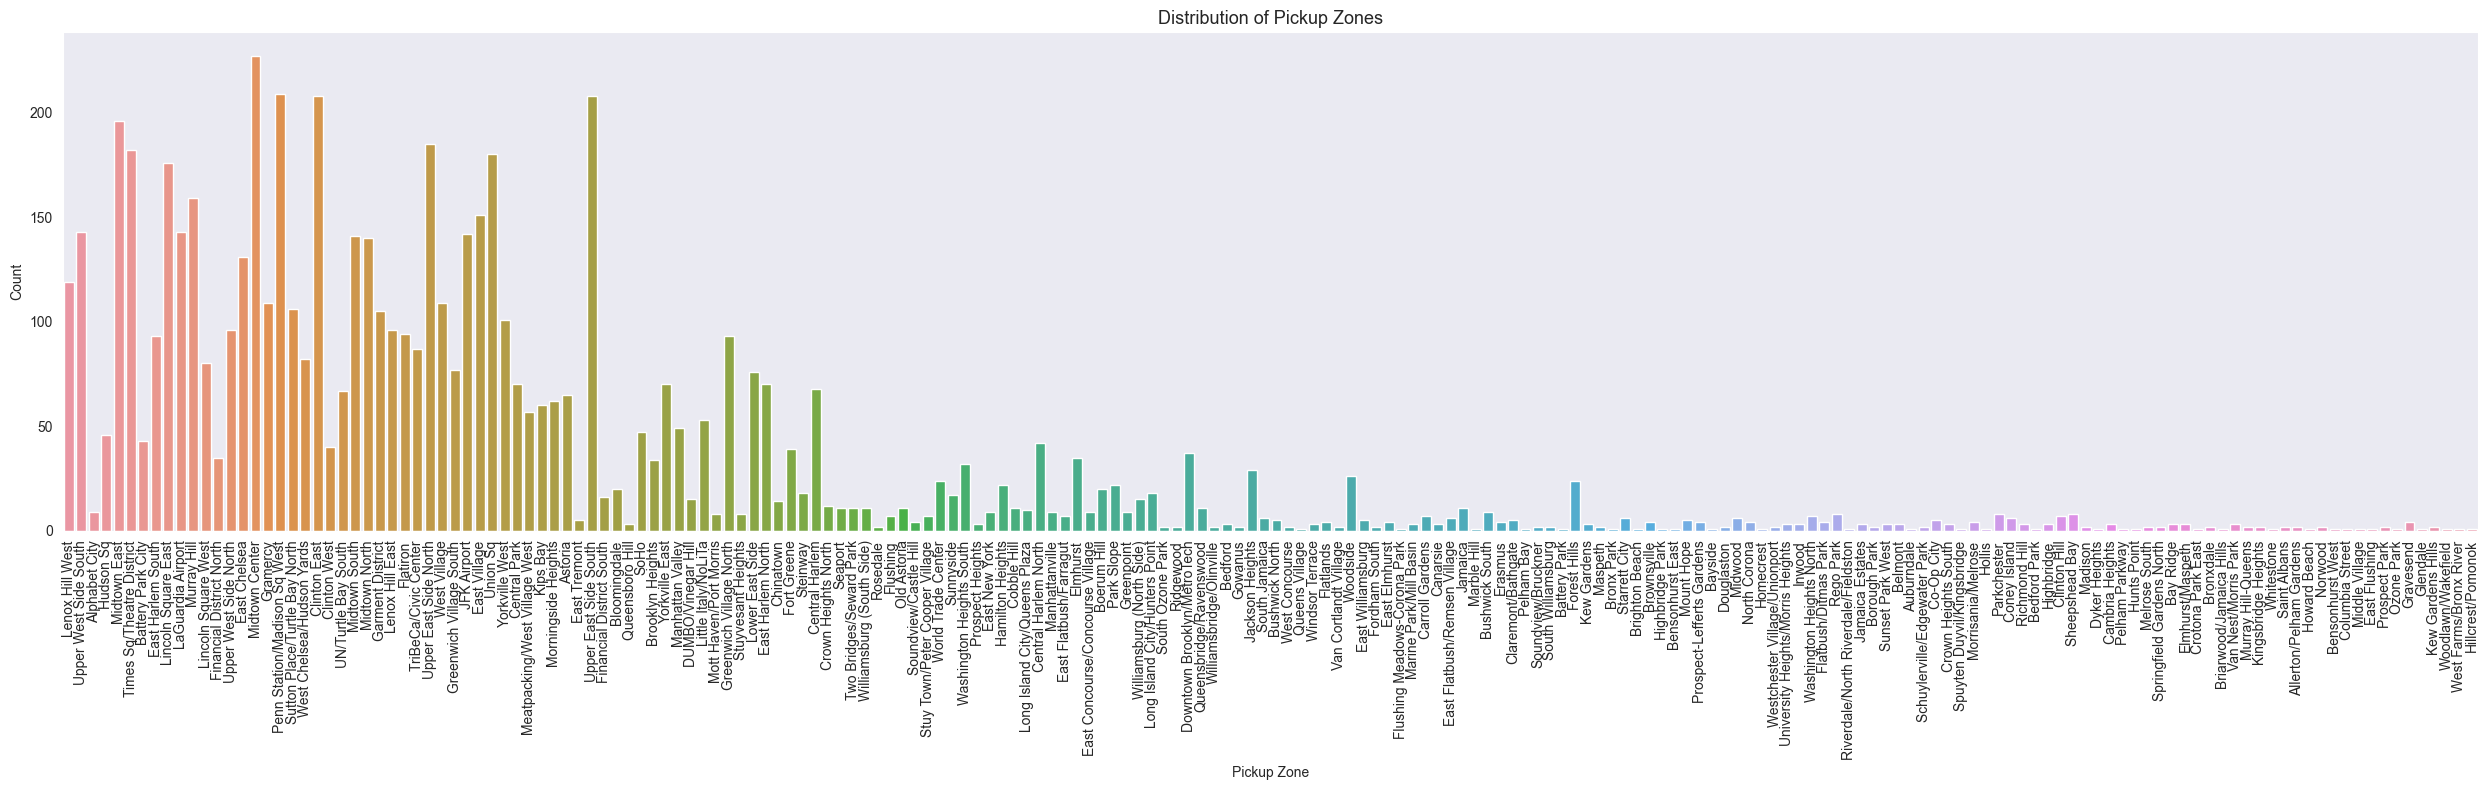

In [251]:
plt.figure(figsize=(25, 8))
sns.countplot(x='pickup_zone', data=df)
plt.title('Distribution of Pickup Zones', fontsize=13)
plt.xlabel('Pickup Zone')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [252]:
frequency_table('pickup_zone')

,pickup_zone
pickup_zone,
Midtown Center,227
Penn Station/Madison Sq West,209
Upper East Side South,208
Clinton East,208
Midtown East,196
Upper East Side North,185
Times Sq/Theatre District,182
Union Sq,180
Lincoln Square East,176


## 4.4 Dropoff Zone <a id=4.4></a>

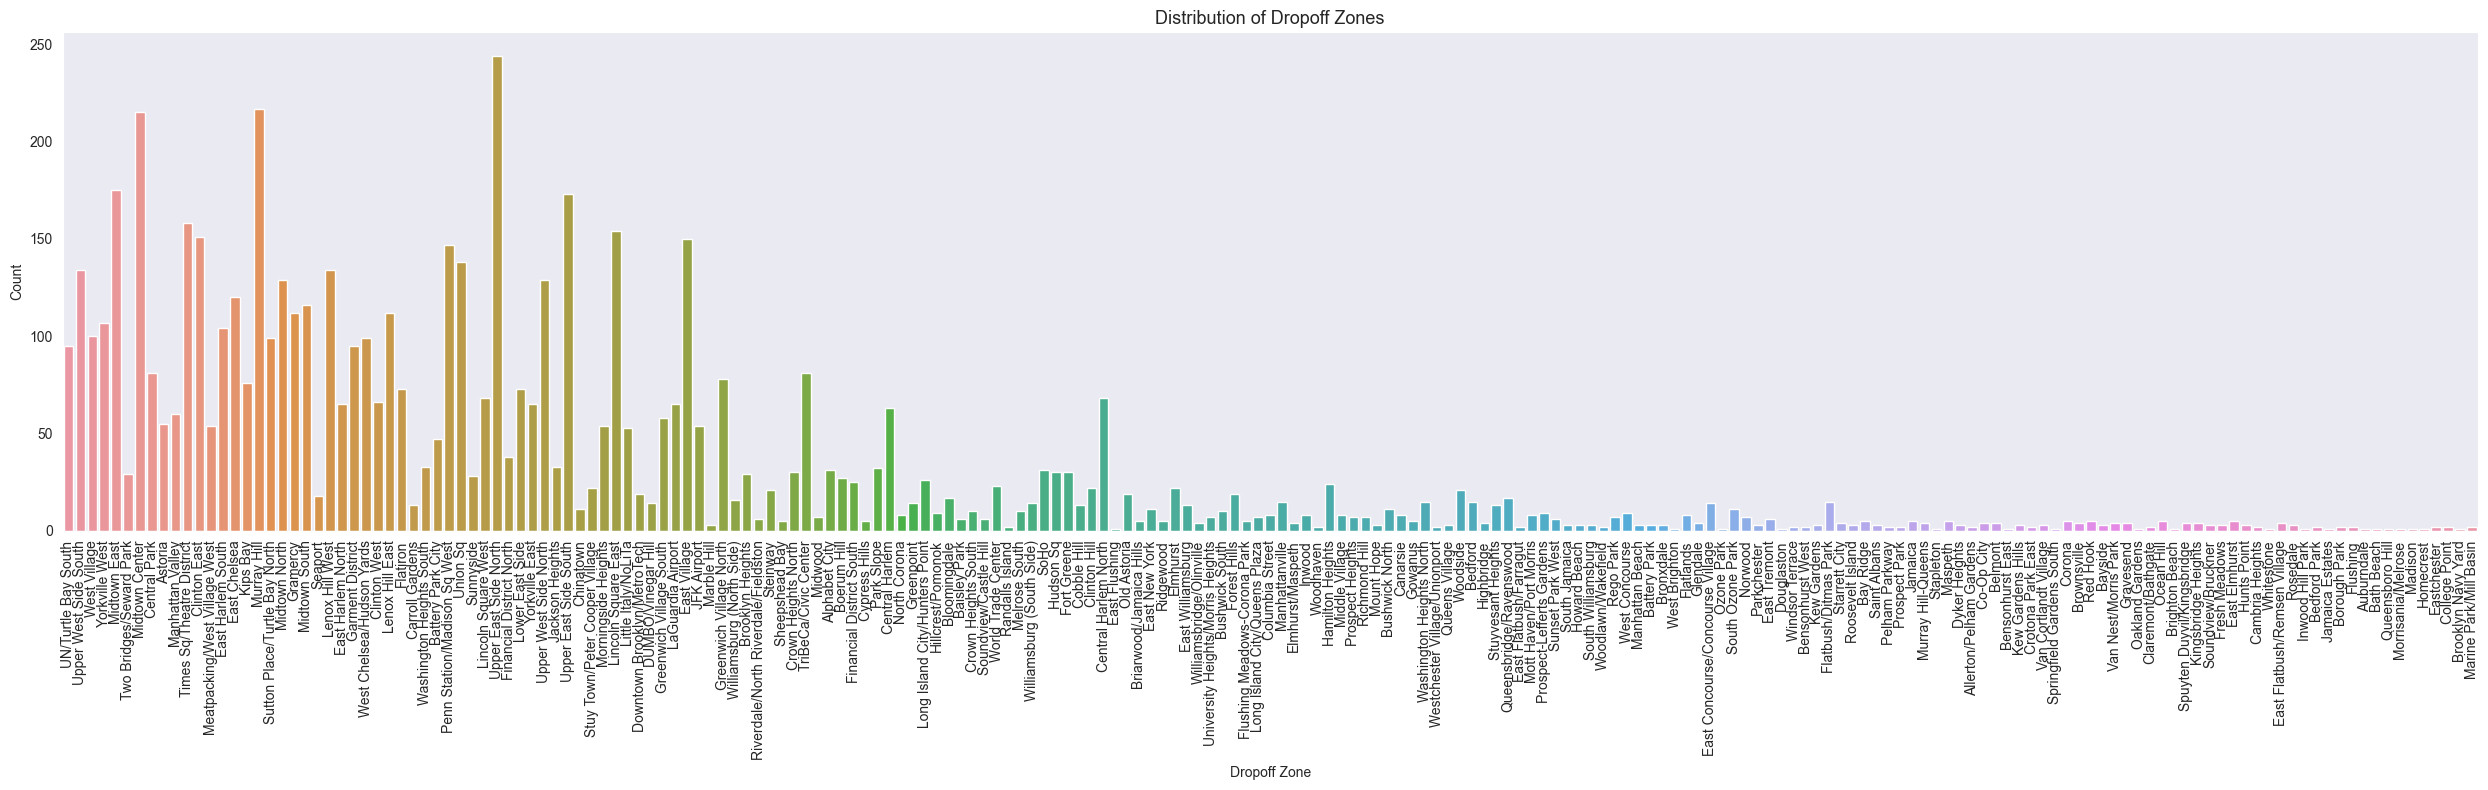

In [253]:
plt.figure(figsize=(25, 8))
sns.countplot(x='dropoff_zone', data=df)
plt.title('Distribution of Dropoff Zones', fontsize=13)
plt.xlabel('Dropoff Zone')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [254]:
frequency_table('dropoff_zone')

,dropoff_zone
dropoff_zone,
Upper East Side North,244
Murray Hill,217
Midtown Center,215
Midtown East,175
Upper East Side South,173
Times Sq/Theatre District,158
Lincoln Square East,154
Clinton East,151
East Village,150


## 4.5 Dropoff Borough <a id=4.5></a>

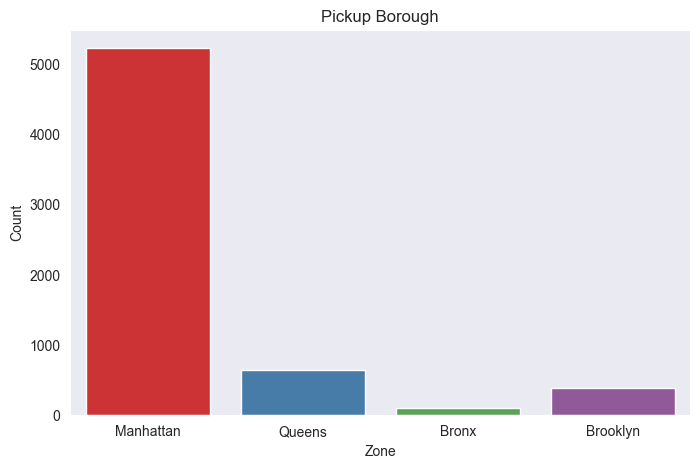

In [255]:
plt.figure(figsize=(8, 5))
sns.set_style('dark')
sns.countplot(data=df, x='pickup_borough', palette='Set1')
plt.title("Pickup Borough")
plt.xlabel("Zone")
plt.ylabel("Count")
plt.show()

## 4.6 Pickup Borough <a id=4.6></a>

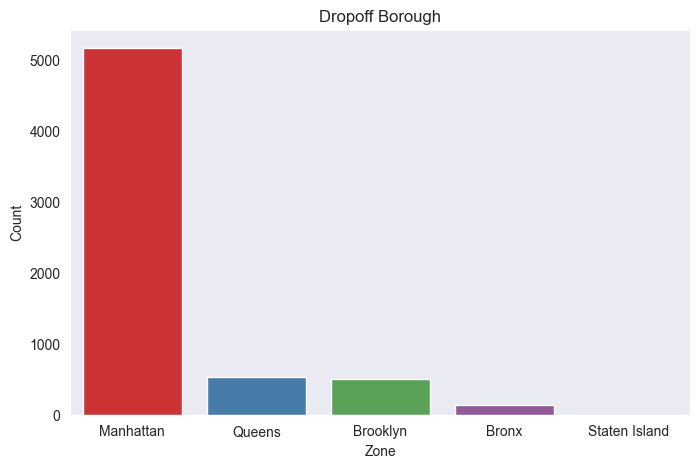

In [256]:
plt.figure(figsize=(8, 5))
sns.set_style('dark')
sns.countplot(data=df, x='dropoff_borough', palette='Set1')
plt.title("Dropoff Borough")
plt.xlabel("Zone")
plt.ylabel("Count")
plt.show()

## 4.7 Hourly Demands <a id=4.7></a>

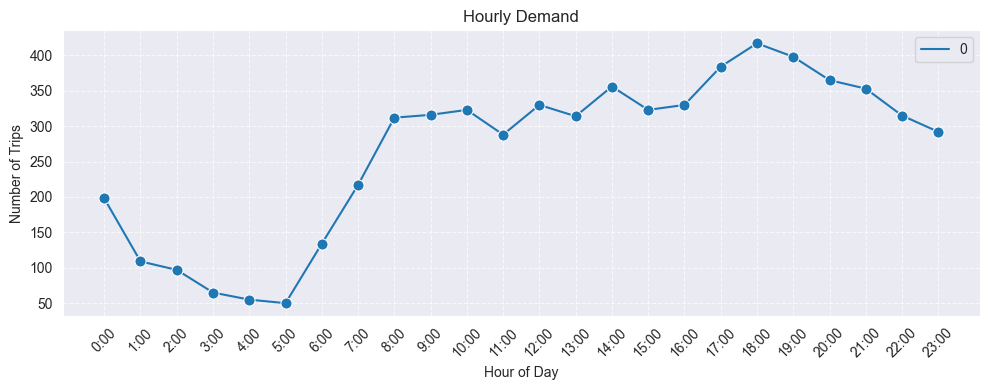

In [257]:
hourly_demand = df.groupby(df['pickup'].dt.hour).size().to_frame()

plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly_demand, color='blue', marker='o', markersize=8, linestyle='-')
plt.title("Hourly Demand")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24), [f'{hour}:00' for hour in range(24)], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.8 Daily Demands <a id=4.8></a>

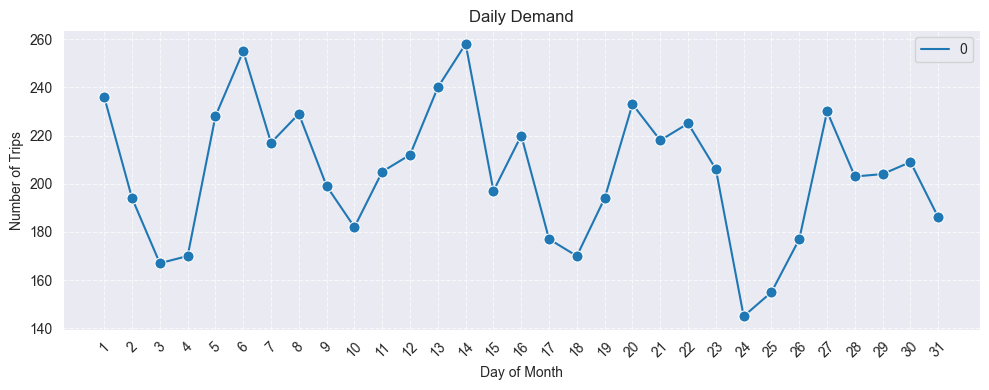

In [258]:
daily_demands = df.groupby('trip_day').size().to_frame()

plt.figure(figsize=(10, 4))
sns.lineplot(data=daily_demands, color='blue', marker='o', markersize=8, linestyle='-')
plt.title("Daily Demand")
plt.xlabel("Day of Month")
plt.ylabel("Number of Trips")
plt.xticks(range(1, 32), [f'{day}' for day in range(1, 32)], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.9 Most Visit Pickup/Dropoff Zones <a id=4.9></a>

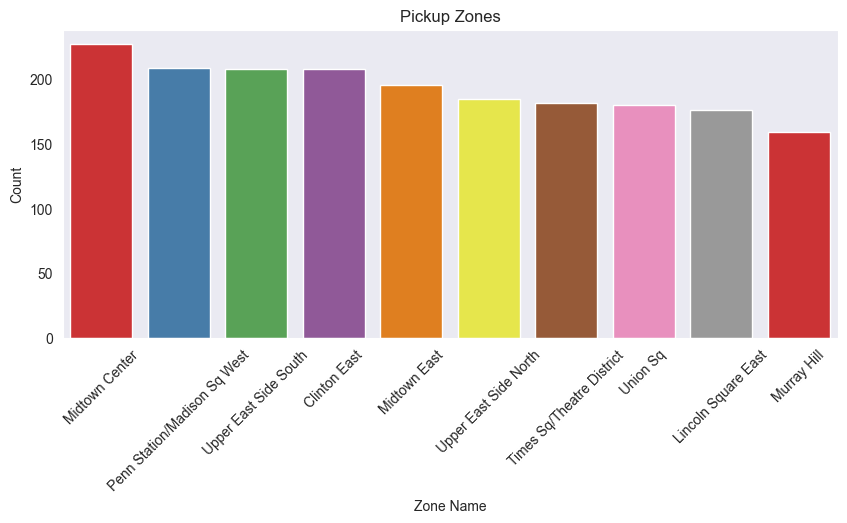

In [259]:
pickup_df = df['pickup_zone'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=pickup_df.index, y=pickup_df, palette='Set1')
plt.title("Pickup Zones")
plt.xlabel("Zone Name")
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

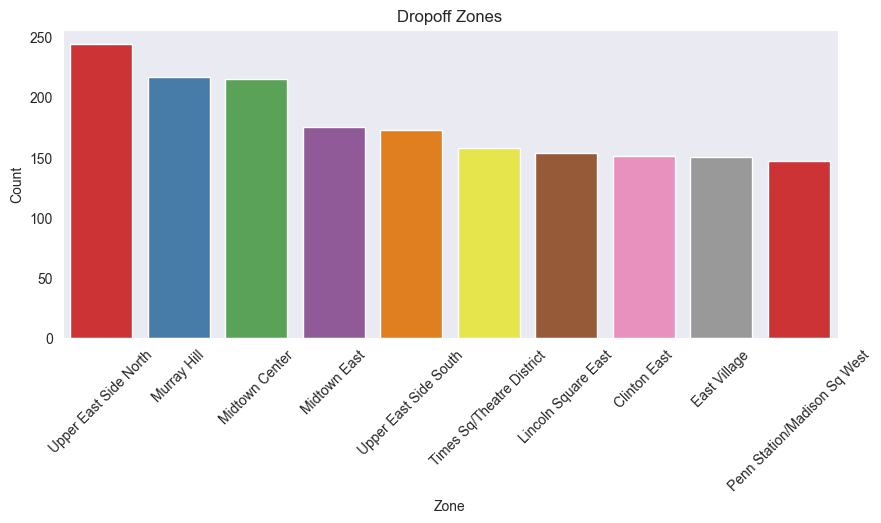

In [260]:
dropoff_df = df['dropoff_zone'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=dropoff_df.index, y=dropoff_df,palette='Set1')
plt.title("Dropoff Zones")
plt.xlabel("Zone")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## 4.10 Longest Trips <a id=4.10></a>

In [261]:
pickup_dropoff_df = df.groupby(['pickup_zone', 'dropoff_zone'])[[ 'distance']].mean()
pickup_dropoff_df = pickup_dropoff_df.nlargest(10, 'distance')

In [262]:
pickup_dropoff_df

,,distance
pickup_zone,dropoff_zone,
JFK Airport,Meatpacking/West Village West,30.230
World Trade Center,JFK Airport,28.300
Financial District North,JFK Airport,28.150
Sunset Park West,Saint Albans,25.510
East Harlem North,Brooklyn Heights,25.280
Starrett City,Washington Heights North,24.480
JFK Airport,Riverdale/North Riverdale/Fieldston,24.200
Kingsbridge Heights,Kingsbridge Heights,23.610
JFK Airport,Mount Hope,23.300


<Figure size 1000x500 with 0 Axes>

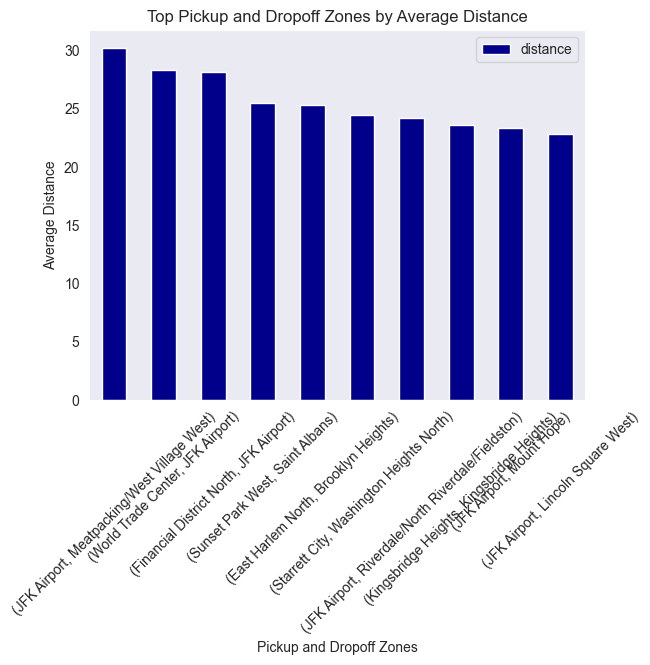

In [263]:
plt.figure(figsize=(10, 5))
pickup_dropoff_df.plot(kind='bar', color='darkblue')
plt.title('Top Pickup and Dropoff Zones by Average Distance')
plt.xlabel('Pickup and Dropoff Zones')
plt.ylabel('Average Distance')
plt.xticks(rotation=45)
plt.show()

## 4.11 Numeric Variables Distributions <a id=4.11></a>

In [264]:
def get_dist(col):
  # Get mean , median
  # Calculate mean and median
  mean_val = df[col].mean()
  median_val = df[col].median()

  # Plot Histograim
  sns.set_style('dark')
  plt.figure(figsize=(6, 6))
  sns.histplot(data=df, x=col, bins=80, kde=True, palette='Set1', edgecolor='white')

  # Plot mean and median as vertical lines
  plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
  plt.axvline(median_val, color='black', linestyle='--', label=f'Median: {median_val:.2f}')

  # Add title and x, y label
  plt.title(f"Distribution Of {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequency")
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.grid(axis='y', linestyle='--', alpha=0.8)
  plt.legend(fontsize=10)
  # Show plot
  plt.show()

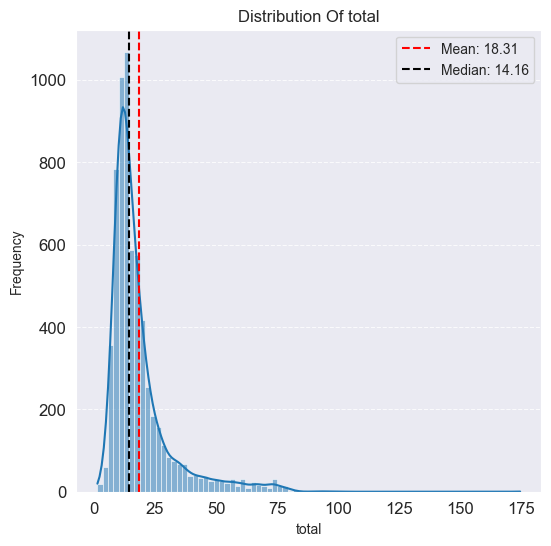

In [265]:
get_dist('total')

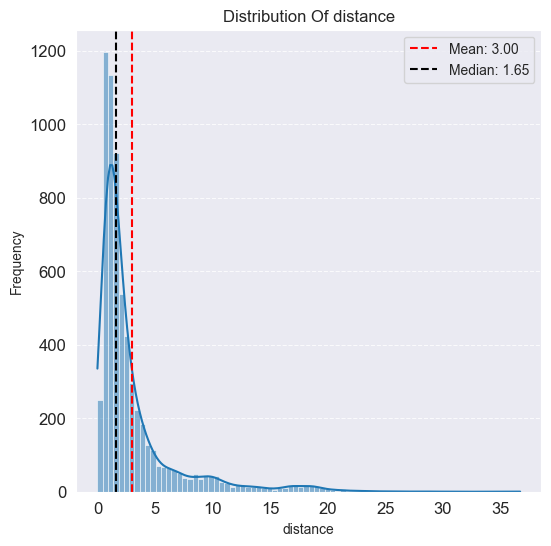

In [266]:
get_dist('distance')

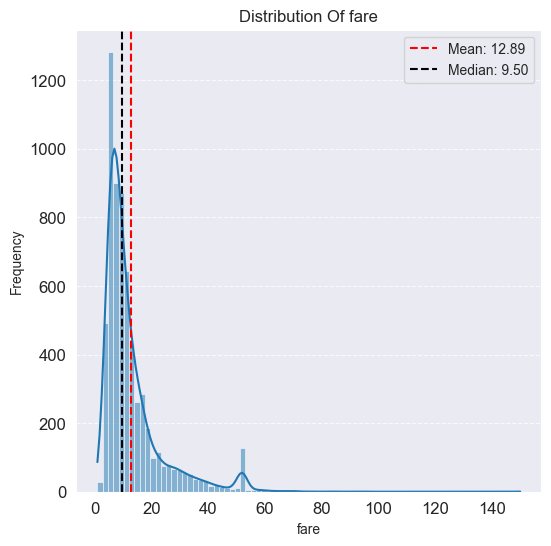

In [267]:
get_dist('fare')

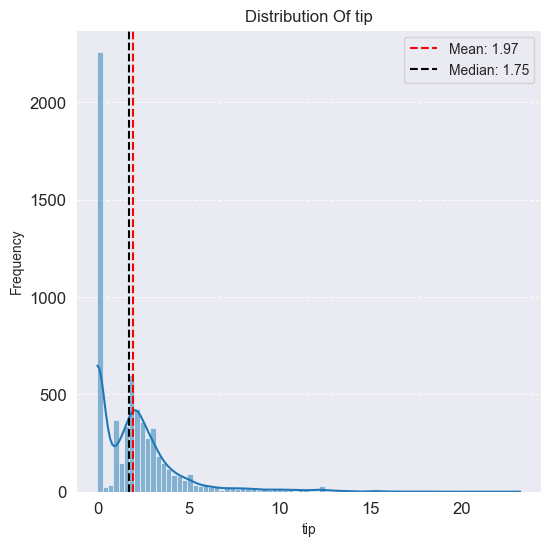

In [268]:
get_dist('tip')

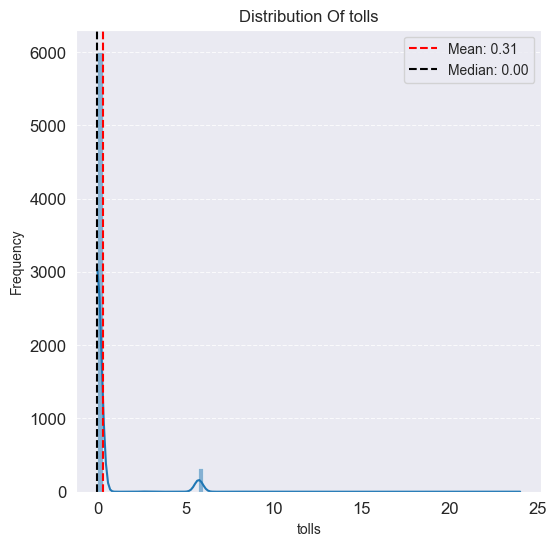

In [269]:
get_dist('tolls')

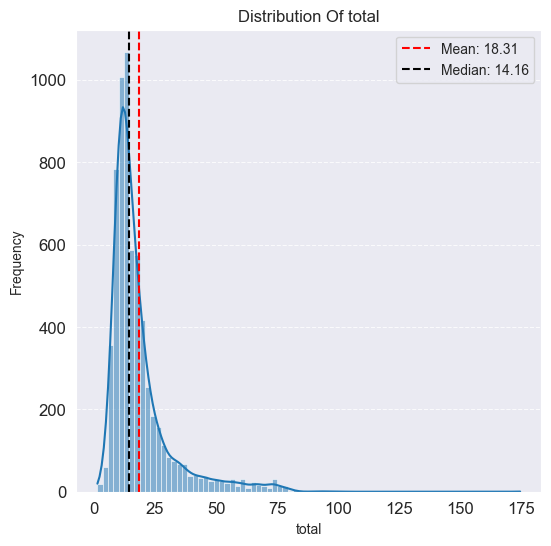

In [270]:
get_dist('total')

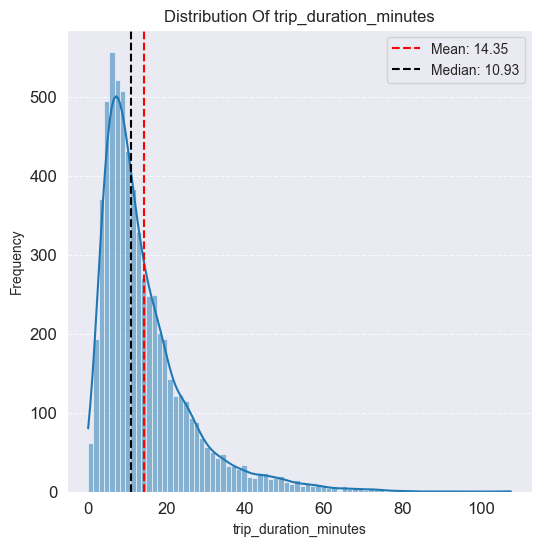

In [271]:
get_dist('trip_duration_minutes')

## 4.12 Boxplot: Checking Outliers for Numeric Variables <a id=4.12></a>

In [272]:
def outlier(col):
  plt.figure(figsize=(5, 4))
  plt.boxplot(col, meanline=True, data=df)
  plt.title(f"{col}'s Boxplot")
  plt.show()

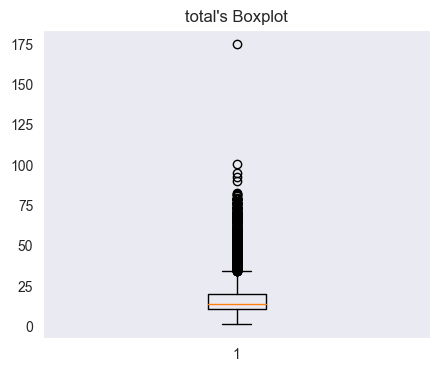

In [273]:
outlier('total')

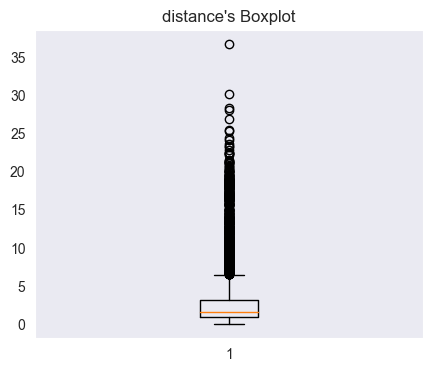

In [274]:
outlier('distance')

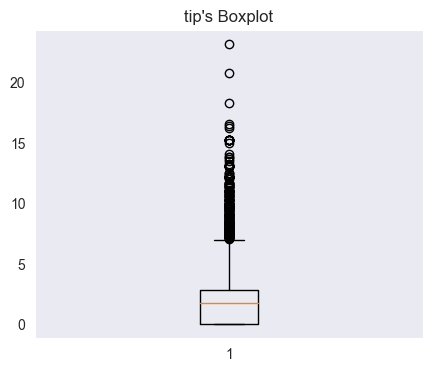

In [275]:
outlier('tip')

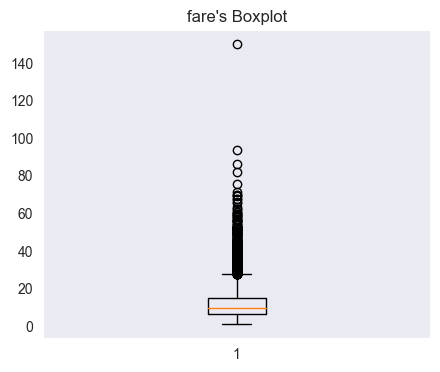

In [276]:
outlier('fare')

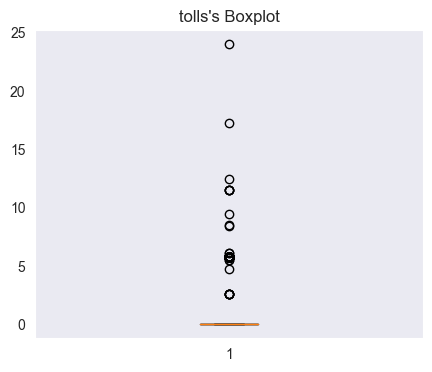

In [277]:
outlier('tolls')

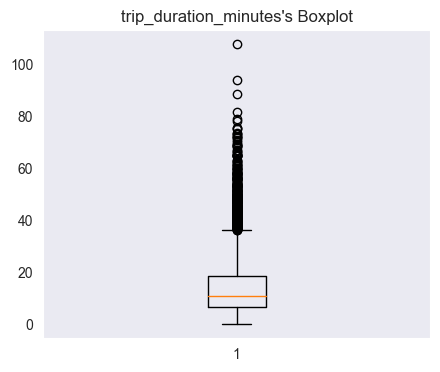

In [278]:
outlier('trip_duration_minutes')

## 4.13 Trip Durations Between Weekdays and Weekends <a id=4.13></a>

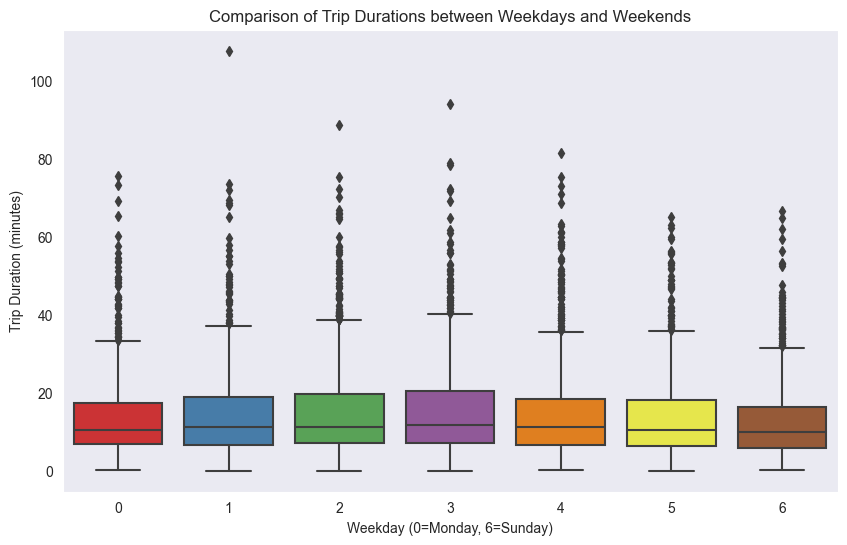

In [279]:
df['weekday'] = df['pickup'].dt.weekday

plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='trip_duration_minutes', data=df, palette='Set1')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Trip Duration (minutes)')
plt.title('Comparison of Trip Durations between Weekdays and Weekends')
plt.show()

## 4.14 Longest and Shortest Trips Based on Duration <a id=4.14></a>

_Longest Trips_

In [280]:
(df.sort_values(by='trip_duration_minutes', ascending=False) \
 [['pickup', 'dropoff', 'distance', 'fare', 'tip', 'total', 'pickup_zone', 'dropoff_zone', 'trip_duration_minutes']].reset_index(drop=True).head(10))

,pickup,dropoff,distance,fare,tip,total,pickup_zone,dropoff_zone,trip_duration_minutes
0,2019-03-05 07:23:49,2019-03-05 09:11:29,22.17,81.86,0.00,82.36,University Heights/Morris Heights,Yorkville East,107.666667
1,2019-03-07 00:28:57,2019-03-07 02:02:55,25.51,93.50,0.00,94.80,Sunset Park West,Saint Albans,93.966667
2,2019-03-06 17:12:17,2019-03-06 18:40:50,12.79,57.00,0.00,58.80,Queensbridge/Ravenswood,Flatlands,88.550000
3,2019-03-29 17:32:20,2019-03-29 18:53:52,26.92,75.50,23.19,100.49,JFK Airport,Cobble Hill,81.533333
4,2019-03-28 17:19:20,2019-03-28 18:38:20,21.10,52.00,0.00,65.56,Lincoln Square West,JFK Airport,79.000000
5,2019-03-21 07:46:28,2019-03-21 09:04:44,12.78,52.00,11.06,66.36,South Ozone Park,Little Italy/NoLiTa,78.266667
6,2019-03-11 07:22:49,2019-03-11 08:38:26,15.70,58.50,6.00,65.30,JFK Airport,Prospect-Lefferts Gardens,75.616667
7,2019-03-15 15:10:03,2019-03-15 16:25:25,16.30,52.00,18.30,79.36,Murray Hill,JFK Airport,75.366667
8,2019-03-27 07:30:10,2019-03-27 08:45:23,18.86,52.00,8.00,69.06,JFK Airport,East Chelsea,75.216667
9,2019-03-19 17:27:58,2019-03-19 18:41:31,7.93,21.08,0.00,21.88,Bushwick South,Marine Park/Mill Basin,73.550000


_Shortest Trips_

In [281]:
(df.sort_values(by='trip_duration_minutes', ascending=True) \
 [['pickup', 'dropoff', 'distance', 'fare', 'tip', 'total', 'pickup_zone', 'dropoff_zone', 'trip_duration_minutes']].reset_index(drop=True).head(10))

,pickup,dropoff,distance,fare,tip,total,pickup_zone,dropoff_zone,trip_duration_minutes
0,2019-03-26 06:57:27,2019-03-26 06:57:30,0.00,7.0,0.00,7.00,Manhattanville,Manhattanville,0.050000
1,2019-03-02 23:51:46,2019-03-02 23:51:49,0.00,14.0,2.86,17.16,Lenox Hill East,Lenox Hill East,0.050000
2,2019-03-20 14:24:28,2019-03-20 14:24:32,0.00,2.5,0.00,3.30,Cobble Hill,Cobble Hill,0.066667
3,2019-03-19 07:20:21,2019-03-19 07:20:25,0.00,2.5,0.00,3.30,Dyker Heights,Dyker Heights,0.066667
4,2019-03-23 08:57:18,2019-03-23 08:57:22,0.02,2.5,0.00,3.30,Sutton Place/Turtle Bay North,Sutton Place/Turtle Bay North,0.066667
5,2019-03-09 13:21:11,2019-03-09 13:21:15,0.00,2.5,0.00,3.30,Garment District,Garment District,0.066667
6,2019-03-21 17:21:44,2019-03-21 17:21:49,0.00,2.5,0.00,4.30,JFK Airport,JFK Airport,0.083333
7,2019-03-02 17:42:00,2019-03-02 17:42:06,0.00,2.5,0.00,3.30,Long Island City/Hunters Point,Long Island City/Hunters Point,0.100000
8,2019-03-15 20:34:02,2019-03-15 20:34:10,0.00,52.0,0.00,52.80,Downtown Brooklyn/MetroTech,Downtown Brooklyn/MetroTech,0.133333
9,2019-03-04 14:17:05,2019-03-04 14:17:13,0.00,2.5,0.00,3.30,JFK Airport,JFK Airport,0.133333


## 4.14.1 Relationship Between Distance, Duration and Total Amount <a id=4.14.1></a>

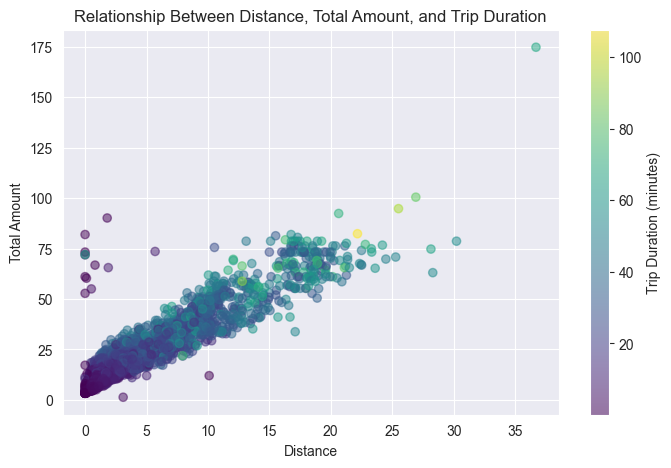

In [282]:
distance = df['distance']
total_amount = df['total']
trip_duration_minutes = df['trip_duration_minutes']

# Creating the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(distance, total_amount, c=trip_duration_minutes, cmap='viridis', alpha=0.5)
plt.colorbar(label='Trip Duration (minutes)')
plt.xlabel('Distance')
plt.ylabel('Total Amount')
plt.title('Relationship Between Distance, Total Amount, and Trip Duration')
plt.grid(True)
plt.show()

## 4.15 Regression Plot: Relationship Between Target (total) And Numeric Variables <a id=4.15></a>

In [283]:
def plot_regplot(y, data=df, title=None, xlabel=None, ylabel=None):
    plt.figure(figsize=(8, 5))
    sns.regplot(x='total', y=y, data=data)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

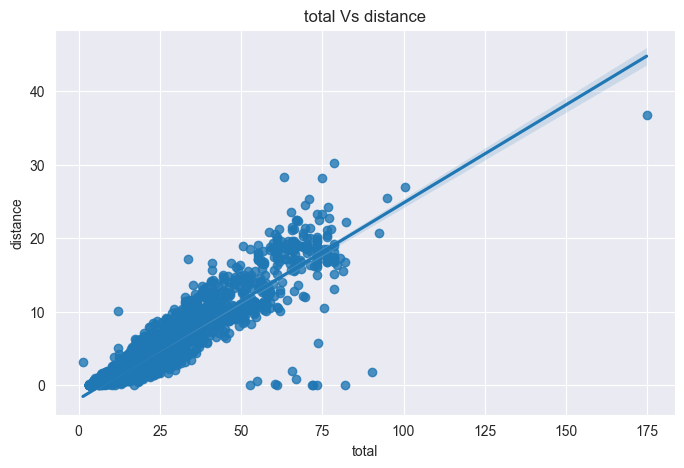

In [284]:
plot_regplot('distance', data=df, title="total Vs distance", xlabel='total', ylabel='distance')

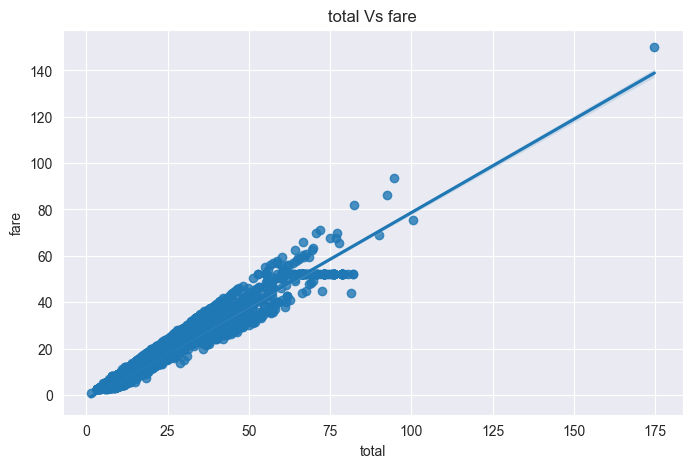

In [285]:
plot_regplot('fare', data=df, title="total Vs fare", xlabel='total', ylabel='fare')

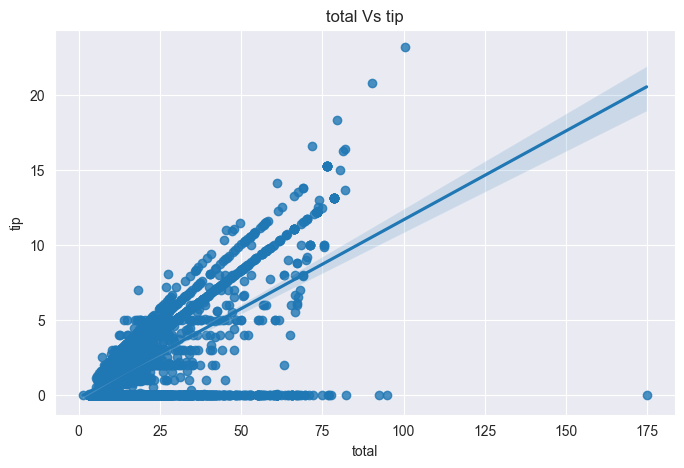

In [286]:
plot_regplot('tip', data=df, title="total Vs tip", xlabel='total', ylabel='tip')

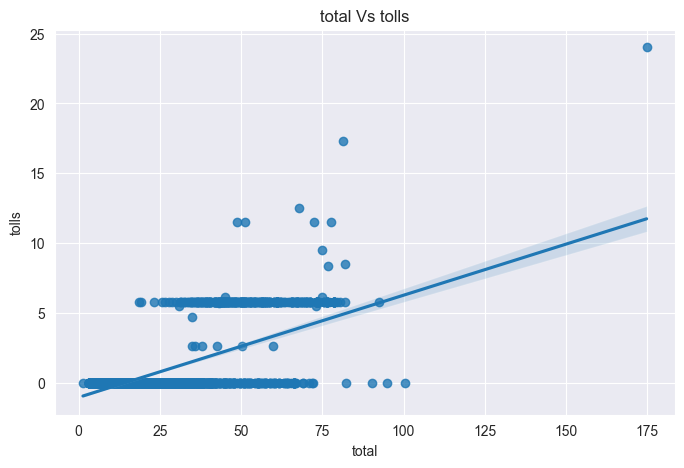

In [287]:
plot_regplot('tolls', data=df, title="total Vs tolls", xlabel='total', ylabel='tolls')

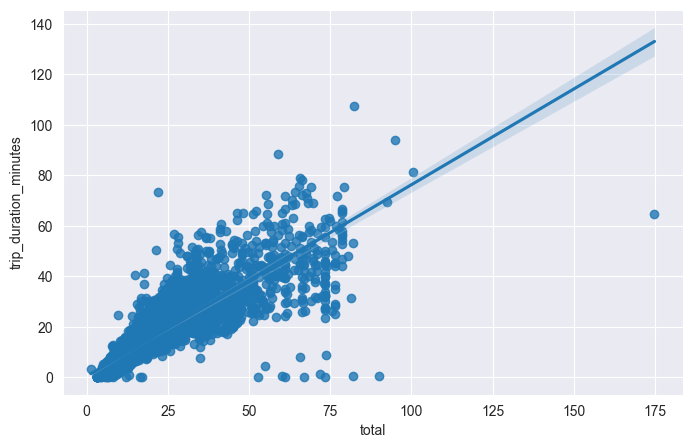

In [288]:
plot_regplot('trip_duration_minutes', data=df)

## 4.16 Correlation Heatmap <a id=4.16></a>

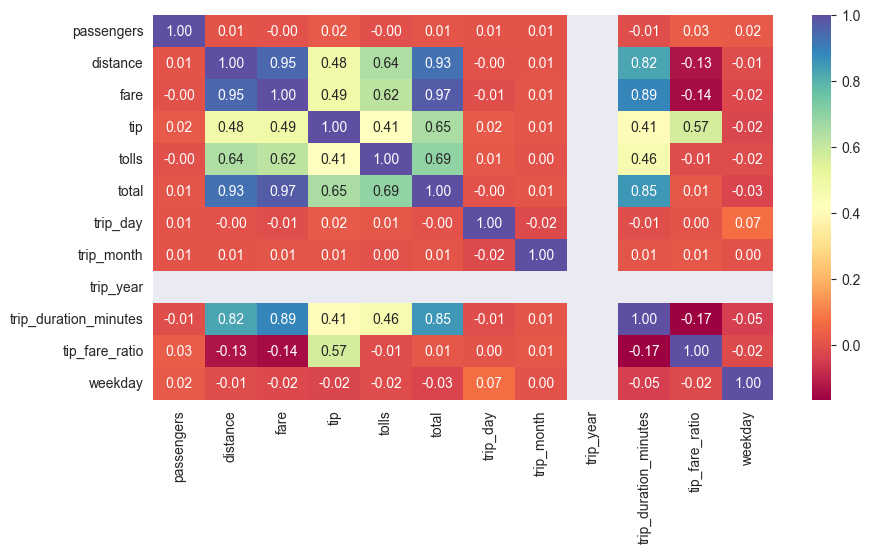

In [289]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=df.corr(numeric_only=True), cmap='Spectral', annot=True, fmt='.2f')
plt.show()

# 5. Modelling (Target: total) <a id=5></a>

## 5.1 Preparing For Modelling <a id=5.1></a>

### 5.1.1 Remove Outlier <a id=5.1.1></a>

In [290]:
# Removie outliers using IQR
def remove_outliers_iqr(df, feature):
    Q1 = np.quantile(df[feature], 0.25)
    Q3 = np.quantile(df[feature], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

columns = ['passengers', 'distance'	,'fare'	,'tip' , 'tolls', 'total']
for col in columns:
  remove_outliers_iqr(df, col)

df.reset_index(inplace=True, drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pickup                 6341 non-null   datetime64[ns]
 1   dropoff                6341 non-null   datetime64[ns]
 2   passengers             6341 non-null   int64         
 3   distance               6341 non-null   float64       
 4   fare                   6341 non-null   float64       
 5   tip                    6341 non-null   float64       
 6   tolls                  6341 non-null   float64       
 7   total                  6341 non-null   float64       
 8   color                  6341 non-null   object        
 9   payment                6341 non-null   object        
 10  pickup_zone            6341 non-null   object        
 11  dropoff_zone           6341 non-null   object        
 12  pickup_borough         6341 non-null   object        
 13  dro

### 5.1.2 Feature Selection <a id=5.1.2></a>

In [318]:
df_model = df[['distance', 'fare', 'tip', 'tolls', 'total']]
df_model.head(1)

,distance,fare,tip,tolls,total
0,1.6,7.0,2.15,0.0,-0.127368


### 5.1.3 Feature Scaling <a id=5.1.3></a>

_Applying logarithmic for variables which have skewness_

In [319]:
# for col in df_model.columns:
for col in ['distance', 'fare', 'tip']:
    df_model[col] = np.log1p(df_model[col])
df_model.head(1)

,distance,fare,tip,tolls,total
0,0.955511,2.079442,1.147402,0.0,-0.127368


_Applying StandardScaler on tolls and total_

In [320]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# for col in df_model.select_dtypes(['int', 'float']):
for col in  ['tolls', 'total']:
  df_model[col] = scaler.fit_transform(df_model[[col]])
df_model.head(1)

,distance,fare,tip,tolls,total
0,0.955511,2.079442,1.147402,-0.229932,-0.413941
1,0.582216,1.791759,0.000000,-0.229932,-0.695808
2,0.862890,2.140066,1.211941,-0.229932,-0.320500
3,2.163323,3.332205,1.967112,-0.229932,1.439435
4,1.150572,2.302585,0.741937,-0.229932,-0.379190


## 5.2 Linear Regression Modelling <a id=5.2></a>

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Choosing Features
X = df_model.drop('total', axis=1)
y = df_model['total']

# Spliting Train & Test Data
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training The Model
model = LinearRegression()

model.fit(X_train, y_train)

# Prediction
y_pred=model.predict(X_test)

# Mean Squared Error & R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Show result
print(f"\n\nMean Squared Error : {mse}")
print(f"R-squared : {r2}")
print(f"model intercept : {model.intercept_}")
print(f"model coef : {model.coef_}")



Mean Squared Error : 0.07930786412711266
R-squared : 0.9202894015401121
model intercept : -2.9292791163812955
model coef : [0.13218857 1.0671973  0.22152299 0.30165402]


## 5.3 Learning Curve <a id=5.3></a>

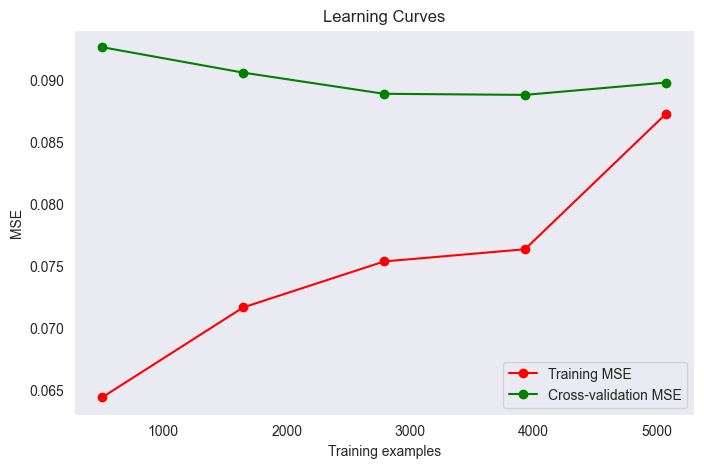

In [345]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training MSE")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation MSE")
    plt.xlabel("Training examples")
    plt.ylabel("MSE")
    plt.title("Learning Curves")
    plt.legend(loc="best")
    plt.show()

# اجرای تابع برای مدل خود
plot_learning_curve(model, X, y)
